--- Bond Parameters ---
Principal: Rs. 1,000,000.00
Annual Coupon Rate: 8.00%
Maturity: 10 years
Compounding Frequency: 2 (semi-annually)
Semi-annual Coupon Payment: Rs. 40,000.00
Total Periods: 20

--- Yield Curve Data and Interpolation ---
Sample Yield Curve Data (Years: Yield):
  3.5Y: 6.50%
  4.5Y: 7.00%
  5.5Y: 7.20%

Interpolated Yields for DV01 Calculation:
  1Y Yield: 6.5000%
  2Y Yield: 6.5000%
  3Y Yield: 6.5000%
  4Y Yield: 6.7500%
  5Y Yield: 7.1000%
  10Y Yield (for Bond YTM): 7.2000%

Assuming Annual YTM for Duration Calculation: 7.2000%
Calculated Bond Price (at 7.2000% YTM): Rs. 1,056,338.63

--- a. Compute the Duration of Bond ---
Macaulay Duration: 7.1556 years
Modified Duration: 6.9070 years

--- b. Calculate the DV01 risk of bond across 1Y, 2Y, 3Y, 4Y and 5Y points ---
DV01 at 1Y Yield (6.5000%): Rs. 776.8365
DV01 at 2Y Yield (6.5000%): Rs. 776.8365
DV01 at 3Y Yield (6.5000%): Rs. 776.8365
DV01 at 4Y Yield (6.7500%): Rs. 759.5909
DV01 at 5Y Yield (7.1000%): Rs. 736.

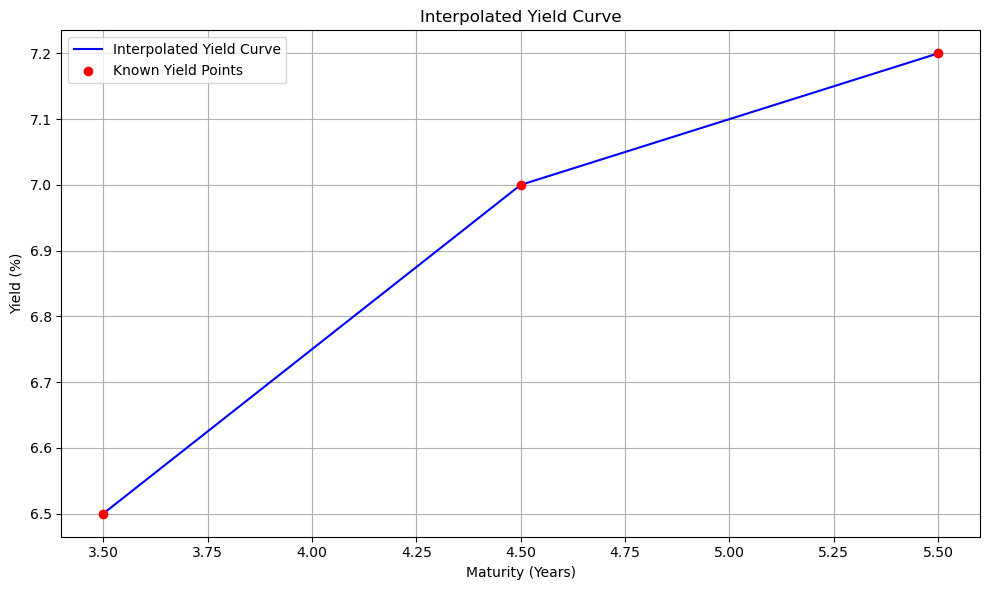

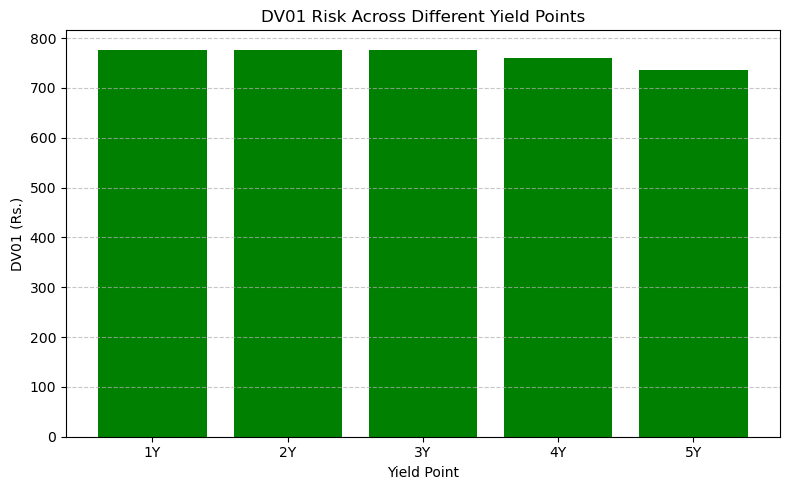

In [3]:
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# --- 1. Bond Parameters ---
# Define the given bond parameters
PRINCIPAL = 10_00_000  # Rs. 10 lakhs
COUPON_RATE = 0.08     # 8% annual coupon rate
MATURITY_YEARS = 10    # 10 years
COMPOUNDING_FREQUENCY = 2 # Semi-annually

# Convert annual coupon rate to semi-annual and total number of periods
SEMI_ANNUAL_COUPON_RATE = COUPON_RATE / COMPOUNDING_FREQUENCY
TOTAL_PERIODS = MATURITY_YEARS * COMPOUNDING_FREQUENCY
SEMI_ANNUAL_COUPON_PAYMENT = PRINCIPAL * SEMI_ANNUAL_COUPON_RATE

print("--- Bond Parameters ---")
print(f"Principal: Rs. {PRINCIPAL:,.2f}")
print(f"Annual Coupon Rate: {COUPON_RATE:.2%}")
print(f"Maturity: {MATURITY_YEARS} years")
print(f"Compounding Frequency: {COMPOUNDING_FREQUENCY} (semi-annually)")
print(f"Semi-annual Coupon Payment: Rs. {SEMI_ANNUAL_COUPON_PAYMENT:,.2f}")
print(f"Total Periods: {TOTAL_PERIODS}\n")


# --- 2. Yield Curve Data and Interpolation Model ---
# As per the request, we'll use sample data for 3.5Y, 4.5Y, 5.5Y
# and then linearly interpolate for other points.
# In a real-world scenario, this would come from market data
# and a more sophisticated interpolation model (e.g., cubic spline, Nelson-Siegel).

# Sample Yield Curve Data (Years vs. Yield)
# These are illustrative yields. In a real scenario, you'd get these from a source.
YIELD_CURVE_DATA = {
    3.5: 0.065,  # 6.5% for 3.5 years
    4.5: 0.070,  # 7.0% for 4.5 years
    5.5: 0.072   # 7.2% for 5.5 years
}

def get_interpolated_yield(target_year, yield_data):
    """
    Linearly interpolates yield for a given target year based on provided yield data.
    Assumes yield_data keys are sorted.
    """
    years = sorted(yield_data.keys())
    yields = [yield_data[y] for y in years]

    if target_year <= years[0]:
        return yields[0] # Extrapolate using the first point
    if target_year >= years[-1]:
        return yields[-1] # Extrapolate using the last point

    for i in range(len(years) - 1):
        if years[i] <= target_year <= years[i+1]:
            y1, y2 = years[i], years[i+1]
            r1, r2 = yields[i], yields[i+1]
            # Linear interpolation formula: r = r1 + (r2 - r1) * (target_year - y1) / (y2 - y1)
            interpolated_rate = r1 + (r2 - r1) * (target_year - y1) / (y2 - y1)
            return interpolated_rate
    return None # Should not happen if target_year is within bounds or handled by extrapolation

print("--- Yield Curve Data and Interpolation ---")
print("Sample Yield Curve Data (Years: Yield):")
for year, yield_val in YIELD_CURVE_DATA.items():
    print(f"  {year}Y: {yield_val:.2%}")

# Get yields for specific points using interpolation
yield_1y = get_interpolated_yield(1, YIELD_CURVE_DATA)
yield_2y = get_interpolated_yield(2, YIELD_CURVE_DATA)
yield_3y = get_interpolated_yield(3, YIELD_CURVE_DATA)
yield_4y = get_interpolated_yield(4, YIELD_CURVE_DATA)
yield_5y = get_interpolated_yield(5, YIELD_CURVE_DATA)
yield_10y = get_interpolated_yield(10, YIELD_CURVE_DATA) # Get 10Y yield for bond YTM

print("\nInterpolated Yields for DV01 Calculation:")
print(f"  1Y Yield: {yield_1y:.4%}")
print(f"  2Y Yield: {yield_2y:.4%}")
print(f"  3Y Yield: {yield_3y:.4%}")
print(f"  4Y Yield: {yield_4y:.4%}")
print(f"  5Y Yield: {yield_5y:.4%}")
print(f"  10Y Yield (for Bond YTM): {yield_10y:.4%}\n")


# --- 3. Bond Pricing Function ---
def calculate_bond_price(principal, coupon_payment, total_periods, yield_to_maturity_per_period):
    """
    Calculates the present value (price) of a bond.
    :param principal: Face value of the bond.
    :param coupon_payment: Coupon payment per period.
    :param total_periods: Total number of coupon periods until maturity.
    :param yield_to_maturity_per_period: Yield to maturity per compounding period (e.g., semi-annual yield).
    :return: Bond price.
    """
    price = 0
    # Present value of coupon payments
    for t in range(1, total_periods + 1):
        price += coupon_payment / ((1 + yield_to_maturity_per_period)**t)
    # Present value of principal repayment at maturity
    price += principal / ((1 + yield_to_maturity_per_period)**total_periods)
    return price

# For duration calculation, we'll assume a market yield (YTM) for the bond.
# We use the interpolated 10Y yield as the bond's current YTM.
BOND_YTM_ANNUAL = yield_10y
if BOND_YTM_ANNUAL is None:
    # Fallback if 10Y is outside interpolation range or interpolation returns None
    # This might happen if the range of YIELD_CURVE_DATA is too narrow.
    # In a real application, you'd handle this more robustly.
    print("Warning: Could not interpolate 10Y yield. Using a default YTM of 7% for duration calculation.")
    BOND_YTM_ANNUAL = 0.07 # Default to 7% if interpolation fails for 10Y

BOND_YTM_PER_PERIOD = BOND_YTM_ANNUAL / COMPOUNDING_FREQUENCY

current_bond_price = calculate_bond_price(PRINCIPAL, SEMI_ANNUAL_COUPON_PAYMENT, TOTAL_PERIODS, BOND_YTM_PER_PERIOD)
print(f"Assuming Annual YTM for Duration Calculation: {BOND_YTM_ANNUAL:.4%}")
print(f"Calculated Bond Price (at {BOND_YTM_ANNUAL:.4%} YTM): Rs. {current_bond_price:,.2f}\n")


# --- 4. Duration Calculation ---
def calculate_duration(principal, coupon_payment, total_periods, yield_to_maturity_per_period, current_bond_price):
    """
    Calculates Macaulay Duration and Modified Duration of a bond.
    :param principal: Face value of the bond.
    :param coupon_payment: Coupon payment per period.
    :param total_periods: Total number of coupon periods until maturity.
    :param yield_to_maturity_per_period: Yield to maturity per compounding period.
    :param current_bond_price: Current market price of the bond.
    :return: Tuple (Macaulay Duration, Modified Duration)
    """
    sum_pv_times_t = 0
    
    # Calculate present value of each cash flow and sum(PV * t)
    for t in range(1, total_periods + 1):
        cf = coupon_payment
        if t == total_periods: # Last period includes principal repayment
            cf += principal
        
        pv_cf = cf / ((1 + yield_to_maturity_per_period)**t)
        sum_pv_times_t += pv_cf * t

    macaulay_duration = sum_pv_times_t / current_bond_price
    
    # Modified Duration = Macaulay Duration / (1 + YTM per period)
    modified_duration = macaulay_duration / (1 + yield_to_maturity_per_period)

    return macaulay_duration / COMPOUNDING_FREQUENCY, modified_duration / COMPOUNDING_FREQUENCY # Convert to years

print("--- a. Compute the Duration of Bond ---")
macaulay_dur, modified_dur = calculate_duration(PRINCIPAL, SEMI_ANNUAL_COUPON_PAYMENT, TOTAL_PERIODS, BOND_YTM_PER_PERIOD, current_bond_price)
print(f"Macaulay Duration: {macaulay_dur:.4f} years")
print(f"Modified Duration: {modified_dur:.4f} years\n")


# --- 5. DV01 Calculation ---
def calculate_dv01(principal, coupon_payment, total_periods, current_yield_per_period):
    """
    Calculates DV01 (Dollar Value of 01) for a bond.
    DV01 is the change in bond price for a 1 basis point (0.01%) change in yield.
    :param principal: Face value of the bond.
    :param coupon_payment: Coupon payment per period.
    :param total_periods: Total number of coupon periods until maturity.
    :param current_yield_per_period: Current yield to maturity per compounding period.
    :return: DV01 value.
    """
    # Original price
    price_original = calculate_bond_price(principal, coupon_payment, total_periods, current_yield_per_period)

    # Price after yield increases by 1 basis point (0.01%)
    yield_up = current_yield_per_period + (0.0001 / COMPOUNDING_FREQUENCY) # 1 bp / compounding frequency
    price_up = calculate_bond_price(principal, coupon_payment, total_periods, yield_up)

    # Price after yield decreases by 1 basis point (0.01%)
    yield_down = current_yield_per_period - (0.0001 / COMPOUNDING_FREQUENCY)
    price_down = calculate_bond_price(principal, coupon_payment, total_periods, yield_down)

    # DV01 is the average change for a 1 bp move
    dv01 = (price_down - price_up) / 2
    return dv01

print("--- b. Calculate the DV01 risk of bond across 1Y, 2Y, 3Y, 4Y and 5Y points ---")
dv01_points = {
    "1Y": yield_1y,
    "2Y": yield_2y,
    "3Y": yield_3y,
    "4Y": yield_4y,
    "5Y": yield_5y
}

dv01_results = {} # Store DV01 results for plotting
for label, annual_yield in dv01_points.items():
    if annual_yield is not None:
        yield_per_period = annual_yield / COMPOUNDING_FREQUENCY
        dv01_value = calculate_dv01(PRINCIPAL, SEMI_ANNUAL_COUPON_PAYMENT, TOTAL_PERIODS, yield_per_period)
        dv01_results[label] = dv01_value
        print(f"DV01 at {label} Yield ({annual_yield:.4%}): Rs. {dv01_value:,.4f}")
    else:
        print(f"Could not interpolate yield for {label}. Skipping DV01 calculation.")

# --- 6. Visualization of Results ---
print("\n--- Generating Visualizations ---")

# Plotting the Interpolated Yield Curve
plt.figure(figsize=(10, 6))
# Create a range of years for plotting the interpolated curve
plot_years = np.linspace(min(YIELD_CURVE_DATA.keys()), max(YIELD_CURVE_DATA.keys()), 100)
plot_yields = [get_interpolated_yield(y, YIELD_CURVE_DATA) for y in plot_years]

plt.plot(plot_years, [y * 100 for y in plot_yields], label='Interpolated Yield Curve', color='blue')
plt.scatter(list(YIELD_CURVE_DATA.keys()), [y * 100 for y in YIELD_CURVE_DATA.values()], color='red', zorder=5, label='Known Yield Points')
plt.title('Interpolated Yield Curve')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting DV01 across different yield points
if dv01_results:
    dv01_labels = list(dv01_results.keys())
    dv01_values = list(dv01_results.values())

    plt.figure(figsize=(8, 5))
    plt.bar(dv01_labels, dv01_values, color='green')
    plt.title('DV01 Risk Across Different Yield Points')
    plt.xlabel('Yield Point')
    plt.ylabel('DV01 (Rs.)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No DV01 results to plot.")

